Name : Dilshan J.V.A.P

Index number : 190144D

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(-0.5, 719.5, 809.5, -0.5)

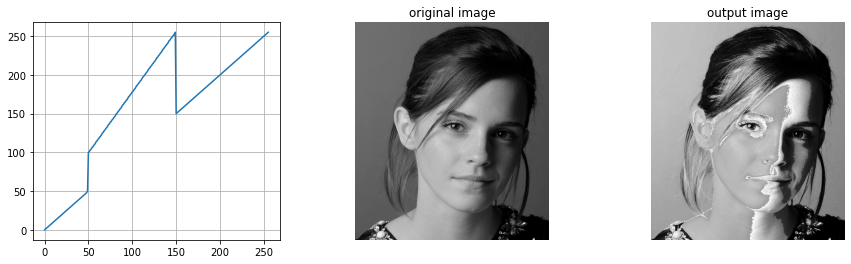

In [7]:
#(1)
im=cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
t1= np.linspace (0,50,50)
t2= np.linspace (100,255,100)
t3= np.linspace (150,255,106)
t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)

assert len(t) ==256
g= cv.LUT(im,t)

fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(t)
ax[0].grid()
ax[1].imshow(im,'gray')
ax[1].set_title(r'original image')
ax[1].axis('off')
ax[2].imshow(g,'gray')
ax[2].set_title(r'output image')
ax[2].axis('off')

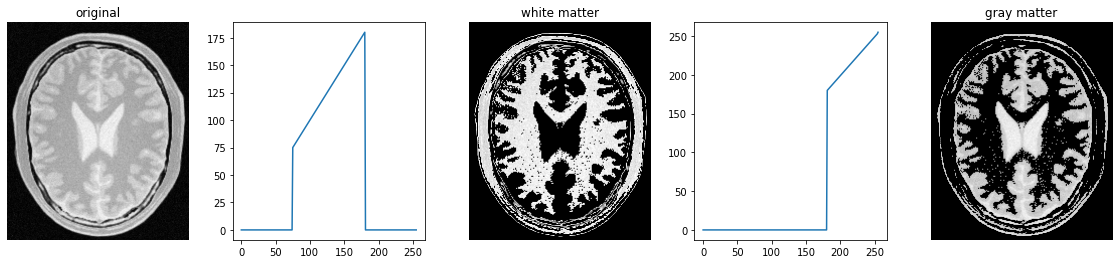

In [12]:
#(2)
im2=cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

#(a) white matter
t1= np.linspace (0,0,75)
t2= np.linspace (75,180,106)
t3= np.linspace (0,0,75)
white_t= np.concatenate((t1,t2,t3), axis =0).astype(np.uint8)
assert len(white_t) ==256
g1= cv.LUT(im2,white_t)

#(b) gray matter
t4=np.linspace (0,0,75)
t5= np.linspace (0,0,106)
t6= np.linspace (180,255,75)
gray_t= np.concatenate((t4,t5,t6), axis =0).astype(np.uint8)
assert len(gray_t) ==256
g2= cv.LUT(im2,gray_t)

fig,ax = plt.subplots(1,5,figsize=(20,4))
ax[0].imshow(im2,'gray')
ax[0].set_title(r'original')
ax[1].plot(white_t)
ax[2].imshow(g1,'gray')
ax[2].set_title(r'white matter')
ax[3].plot(gray_t)
ax[4].imshow(g2,'gray')
ax[4].set_title(r'gray matter')

for  i in range(0,5,2):
    ax[i].axis('off')

Text(0.5, 1.0, 'Histogram of L plane of after gamma correction')

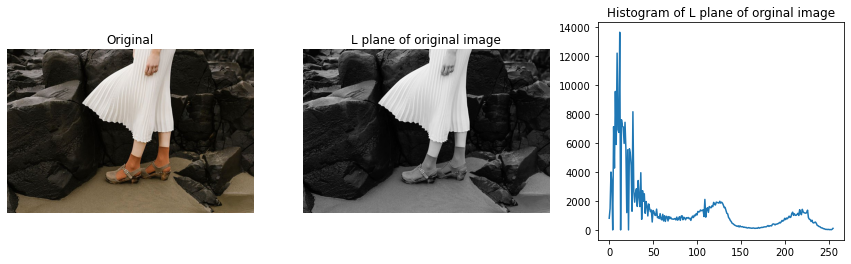

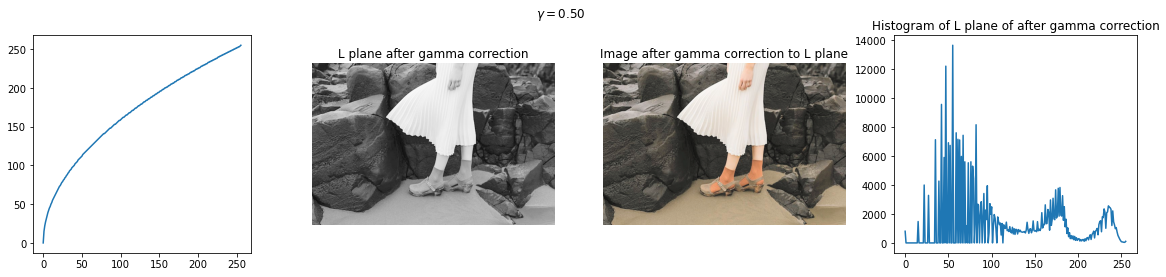

In [18]:
#(3)
im3 = cv.imread(r'highlights_and_shadows.jpg')
assert im3 is not None

im3_Lab = cv.cvtColor(im3, cv.COLOR_BGR2Lab)
L,a,b = cv.split(im3_Lab)
hist_org = cv.calcHist([L], [0], None, [256], [0,256])

fig, ax = plt.subplots(1,3,figsize = (15,4))
ax[0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(L, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].set_title('L plane of original image')
ax[2].plot(hist_org)
ax[2].set_title('Histogram of L plane of orginal image')
ax[0].axis('off')
ax[1].axis('off')

gamma = 0.5
lt = np.array([((i/255)**gamma)*255 for i in range(0,256)]).astype(np.uint8)
L2 = cv.LUT(L, lt)
im3_Lab[:,:,0] = L2
hist = cv.calcHist([L2], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('$ \gamma = %.2f$'%gamma)
ax[0].plot(lt)
ax[0].set_aspect('equal')
ax[1].imshow(cv.cvtColor(L2, cv.COLOR_BGR2RGB))
ax[1].set_title('L plane after gamma correction')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(im3_Lab, cv.COLOR_Lab2RGB))
ax[2].set_title('Image after gamma correction to L plane')
ax[2].axis('off')
ax[3].plot(hist)
ax[3].set_title('Histogram of L plane of after gamma correction')

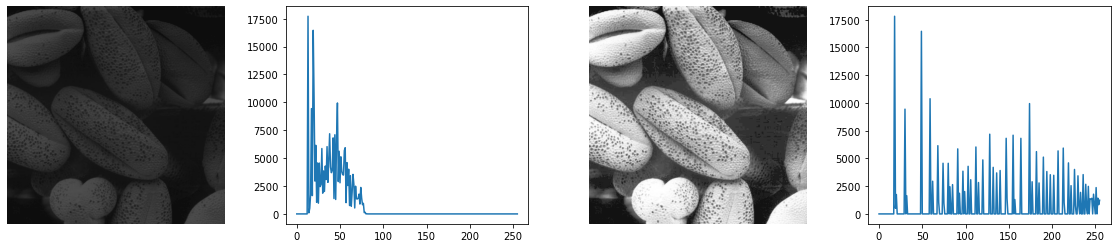

In [4]:
#(4)
im4 = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert im4 is not None

def grayImgEqualize(img):
    M,N = img.shape
    L = 256
    hist = cv.calcHist([img], [0], None, [256], [0,256]) 
    
    lt = []
    sum = 0
    for k in hist:
        sum+=k[0]
        lt.append(round((sum*(L-1))/(M*N)))
    return np.array(lt)

hist_org = cv.calcHist([im4], [0], None, [256], [0,256])

lt =grayImgEqualize(im4)
im_equalized = cv.LUT(im4, lt)
hist = cv.calcHist([im_equalized.astype(np.uint8)], [0], None, [256], [0,256]) 

fig, ax = plt.subplots(1,4,figsize = (20,4))
ax[0].imshow(cv.cvtColor(im4, cv.COLOR_GRAY2RGB))
ax[0].axis('off')
ax[1].plot(hist_org)
ax[2].imshow(cv.cvtColor(im_equalized.astype(np.uint8), cv.COLOR_GRAY2RGB))
ax[2].axis('off')
ax[3].plot(hist)


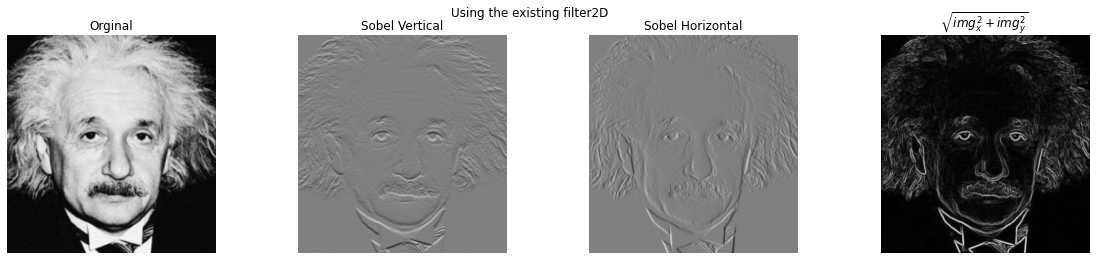

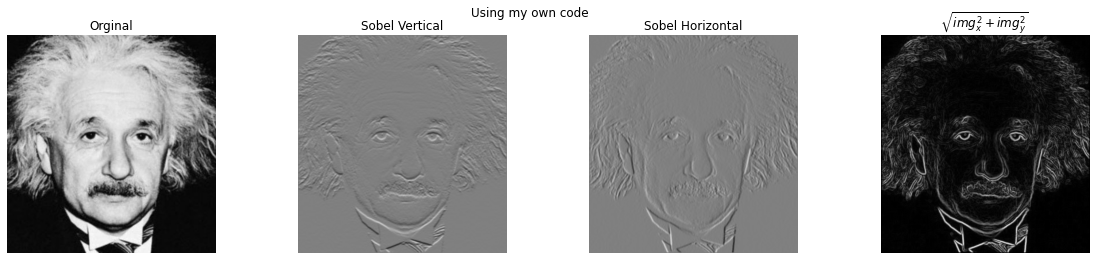

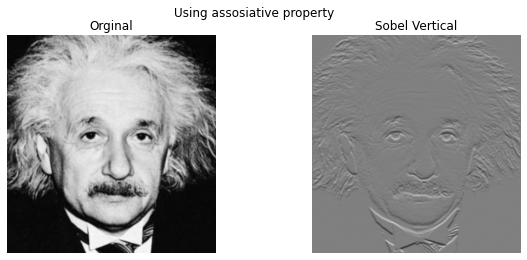

In [11]:
#(6)
img0 = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img0 is not None

xDir =  np.array([ ( -1 , -2 , -1 ) , ( 0 , 0 , 0 ) , ( 1 , 2 , 1 ) ] , dtype = np.float32 )
yDir =  np.array([ ( -1 , 0 , 1 ) , ( -2 , 0 , 2 ) , ( -1 , 0 , 1 ) ] , dtype = np.float32 )

##(a)Using the existing filter2D
img1 = cv.filter2D(img0 ,-1 ,xDir)
img2 = cv.filter2D(img0 ,-1 ,yDir)
img3= np.sqrt(img1**2 + img2**2)

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using the existing filter2D')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img1, cmap = 'gray',vmin =-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img2, cmap = 'gray',vmin =-1020, vmax=1020)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img3, cmap = 'gray')

for  i in range(4):
    ax[i].axis('off')

##(b)Using my own code
def my_func(img,kernel):
    M,N = img.shape
    imgNew=np.zeros((M,N))
    ksizex,ksizey = kernel.shape
    for i in range(M):
        for j in range(N):
            if (i<np.floor(ksizex/2) or j<np.floor(ksizey/2) or j> N - np.floor(ksizey/2) -1 or i> M - np.floor(ksizex/2)-1):
                imgNew[i][j]=0
            else:
                imgNew[i][j] = sum(sum(kernel*img[i-int(np.floor(ksizex/2)):i+int(np.floor(ksizex/2))+1 , j-int(np.floor(ksizey/2)):j+int(np.floor(ksizey/2))+1]))
    return imgNew        

fig, ax = plt.subplots(1,4,figsize = (20,4))
fig.suptitle('Using my own code')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)

img_sobel_vertical=my_func(img0,xDir)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img_sobel_vertical, cmap = 'gray',vmin =-1020, vmax=1020)
img_sobel_horizontal=my_func(img0,yDir)
ax[2].set_title('Sobel Horizontal')
ax[2].imshow(img_sobel_horizontal, cmap = 'gray',vmin =-1020, vmax=1020)
img2= np.sqrt(img_sobel_vertical**2 + img_sobel_horizontal**2)
ax[3].set_title('$\sqrt{img_x^2+img_y^2}$')
ax[3].imshow(img2, cmap = 'gray')

for i in range(4):
    ax[i].axis('off')

##(C)
A = np.array([[1,2,1]])
B = np.array([[-1],[0],[1]])
img1 =my_func(my_func(img0, A),B)
img3 = my_func(my_func(img0, B.T),A.T)

fig, ax = plt.subplots(1,2,figsize = (10,4))
fig.suptitle('Using assosiative property')
ax[0].set_title('Orginal')
ax[0].imshow(img0, cmap = 'gray', vmin =0 , vmax = 255)
ax[1].set_title('Sobel Vertical')
ax[1].imshow(img1, cmap = 'gray',vmin =-1020, vmax=1020)

for  i in range(2):
    ax[i].axis('off')


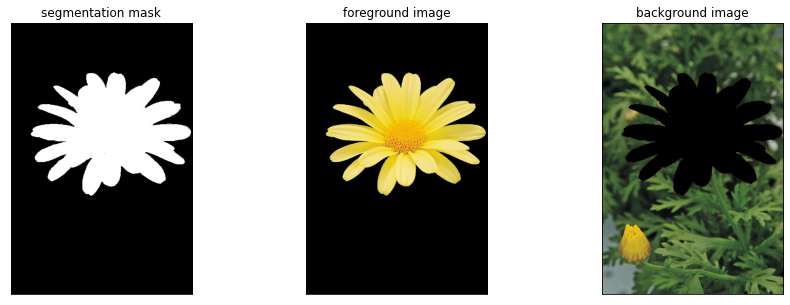

In [32]:

image = cv.imread(r'daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(image.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
rectangle = (25,125,530,450)
(mask,bgModel,fgModel)=cv.grabCut(image, mask, rectangle,bgModel, fgModel,3, cv.GC_INIT_WITH_RECT)
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1)
outputMask = (outputMask * 255).astype("uint8")
output = cv.bitwise_and(image, image, mask=outputMask)
backImage=image-output
fig,axes=plt.subplots(1,3,figsize=(15,5))
axes[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('segmentation mask')
axes[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('foreground image')
axes[2].imshow(cv.cvtColor(backImage,cv.COLOR_BGR2RGB))
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('background image')
plt.show()

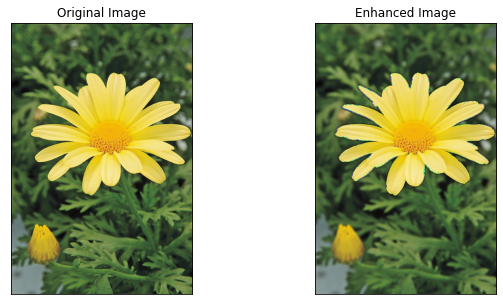

In [34]:
kernel_size=9
sigma=3
blurred_back=cv.GaussianBlur(backImage,(kernel_size,kernel_size),sigma)
enhanced_img=output+blurred_back
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Original Image')
axes[1].imshow(cv.cvtColor(enhanced_img,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('Enhanced Image')
plt.show()